# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as scikit_learn

# Carga/Slicing de datos

In [3]:
dataset = np.load('proyecto_training_data.npy')
trainData = dataset[0:int(len(dataset)*0.8)]
testData = dataset[int(len(dataset)*0.8):len(dataset)]

dataframe = pd.DataFrame(dataset, columns = ['SalePrice','OverallQual','1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
trainDataFrame = pd.DataFrame(trainData, columns = ['SalePrice','OverallQual','1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
testDataFrame = pd.DataFrame(testData, columns = ['SalePrice','OverallQual','1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

display(dataframe)

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [4]:
cols_na = [col for col in dataframe if dataframe[col].isnull().mean()]
for col in cols_na:
  print(f'''{col}-{dataframe[col].isnull().mean()}''')
print(f'''\n{cols_na}\n''')
print(dataframe[cols_na].dtypes)

LotFrontage-0.1773972602739726

['LotFrontage']

LotFrontage    float64
dtype: object


In [5]:
dataframe['LotFrontageMean'] = np.round(dataframe['LotFrontage'].fillna(dataframe['LotFrontage'].mean()))
dataframe['LotFrontageMedian'] = np.round(dataframe['LotFrontage'].fillna(dataframe['LotFrontage'].median()))


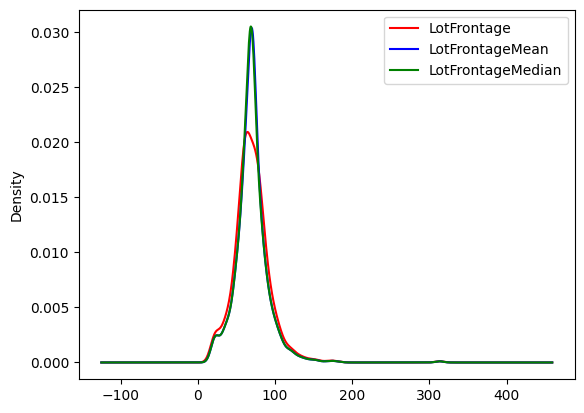

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataframe['LotFrontage'].plot.density(color='red', label='LotFrontage')
dataframe['LotFrontageMean'].plot.density(color='blue', label='LotFrontageMean')
dataframe['LotFrontageMedian'].plot.density(color='green', label='LotFrontageMedian')
ax.legend()
plt.show()

In [22]:
dataframe['LotFrontage'] = np.round(dataframe['LotFrontage'].fillna(dataframe['LotFrontage'].mean()))

# Analisis Exploratorio por Variable


#### Sale Price

In [23]:
print(f'''Media: {dataframe['SalePrice'].mean()}''')
print(f'''Valor Maximo: {dataframe['SalePrice'].max()}''')
print(f'''Valor Minimo: {dataframe['SalePrice'].min()}''')
print(f'''Rango: {dataframe['SalePrice'].max() - dataframe['SalePrice'].min()}''')
print(f'''Desviacion Estandar: {dataframe['SalePrice'].std()}''')

Media: 180921.19589041095
Valor Maximo: 755000.0
Valor Minimo: 34900.0
Rango: 720100.0
Desviacion Estandar: 79442.50288288662


#### Overall Quality

In [24]:
print(f'''Media: {dataframe['OverallQual'].mean()}''')
print(f'''Valor Maximo: {dataframe['OverallQual'].max()}''')
print(f'''Valor Minimo: {dataframe['OverallQual'].min()}''')
print(f'''Rango: {dataframe['OverallQual'].max() - dataframe['OverallQual'].min()}''')
print(f'''Desviacion Estandar: {dataframe['OverallQual'].std()}''')

Media: 6.0993150684931505
Valor Maximo: 10.0
Valor Minimo: 1.0
Rango: 9.0
Desviacion Estandar: 1.3829965467415934


#### First Floor square feet

In [25]:
print(f'''Media: {dataframe['1stFlrSF'].mean()}''')
print(f'''Valor Maximo: {dataframe['1stFlrSF'].max()}''')
print(f'''Valor Minimo: {dataframe['1stFlrSF'].min()}''')
print(f'''Rango: {dataframe['1stFlrSF'].max() - dataframe['1stFlrSF'].min()}''')
print(f'''Desviacion Estandar: {dataframe['1stFlrSF'].std()}''')

Media: 1162.626712328767
Valor Maximo: 4692.0
Valor Minimo: 334.0
Rango: 4358.0
Desviacion Estandar: 386.5877380410744


#### Total rooms above grade

In [26]:
print(f'''Media: {dataframe['TotRmsAbvGrd'].mean()}''')
print(f'''Valor Maximo: {dataframe['TotRmsAbvGrd'].max()}''')
print(f'''Valor Minimo: {dataframe['TotRmsAbvGrd'].min()}''')
print(f'''Rango: {dataframe['TotRmsAbvGrd'].max() - dataframe['TotRmsAbvGrd'].min()}''')
print(f'''Desviacion Estandar: {dataframe['TotRmsAbvGrd'].std()}''')

Media: 6.517808219178082
Valor Maximo: 14.0
Valor Minimo: 2.0
Rango: 12.0
Desviacion Estandar: 1.6253932905840505


#### Year Built

In [27]:
print(f'''Media: {dataframe['YearBuilt'].mean()}''')
print(f'''Valor Maximo: {dataframe['YearBuilt'].max()}''')
print(f'''Valor Minimo: {dataframe['YearBuilt'].min()}''')
print(f'''Rango: {dataframe['YearBuilt'].max() - dataframe['YearBuilt'].min()}''')
print(f'''Desviacion Estandar: {dataframe['YearBuilt'].std()}''')

Media: 1971.267808219178
Valor Maximo: 2010.0
Valor Minimo: 1872.0
Rango: 138.0
Desviacion Estandar: 30.202904042525258


#### Lot Frontage

In [28]:
print(f'''Media: {dataframe['LotFrontage'].mean()}''')
print(f'''Valor Maximo: {dataframe['LotFrontage'].max()}''')
print(f'''Valor Minimo: {dataframe['LotFrontage'].min()}''')
print(f'''Rango: {dataframe['LotFrontage'].max() - dataframe['LotFrontage'].min()}''')
print(f'''Desviacion Estandar: {dataframe['LotFrontage'].std()}''')

Media: 70.04109589041096
Valor Maximo: 313.0
Valor Minimo: 21.0
Rango: 292.0
Desviacion Estandar: 22.024030962875948


# Histograma por variable

<Axes: xlabel='SalePrice', ylabel='Count'>

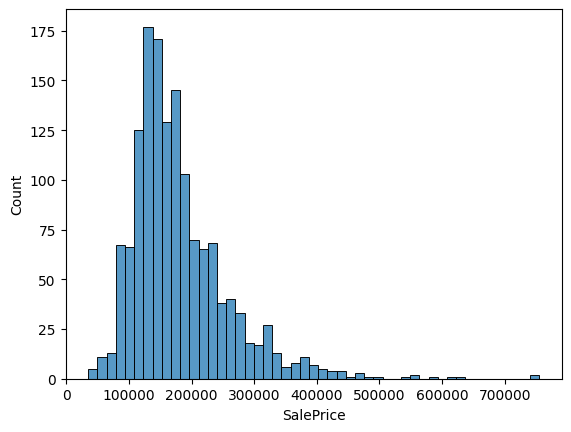

In [29]:
sns.histplot(dataframe['SalePrice'])

<Axes: xlabel='OverallQual', ylabel='Count'>

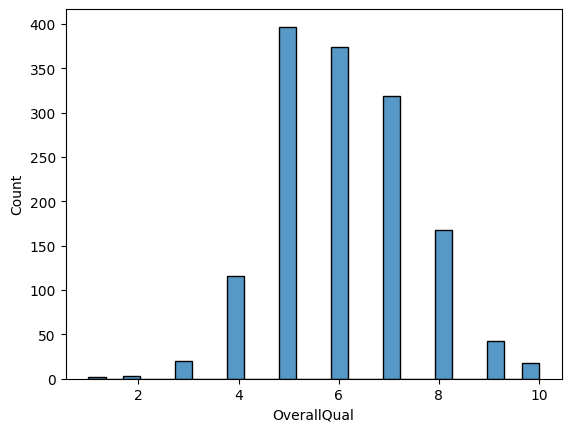

In [30]:
sns.histplot(dataframe['OverallQual'])

<Axes: xlabel='1stFlrSF', ylabel='Count'>

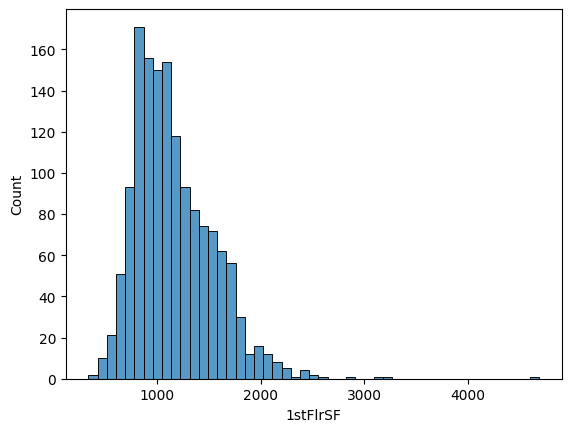

In [31]:
sns.histplot(dataframe['1stFlrSF'])

<Axes: xlabel='TotRmsAbvGrd', ylabel='Count'>

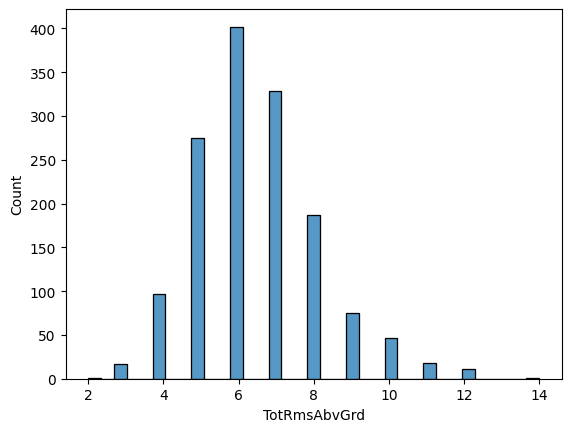

In [32]:
sns.histplot(dataframe['TotRmsAbvGrd'])

<Axes: xlabel='YearBuilt', ylabel='Count'>

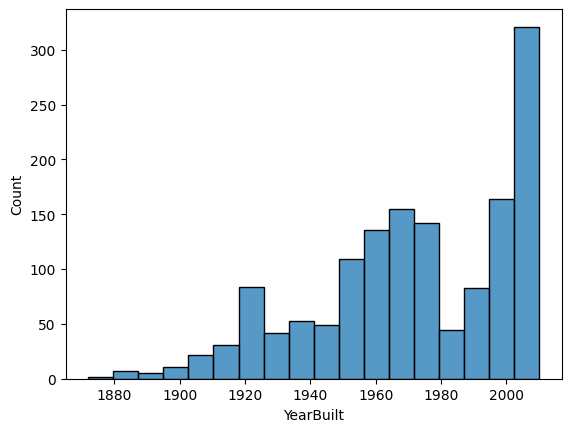

In [33]:
sns.histplot(dataframe['YearBuilt'])

<Axes: xlabel='LotFrontage', ylabel='Count'>

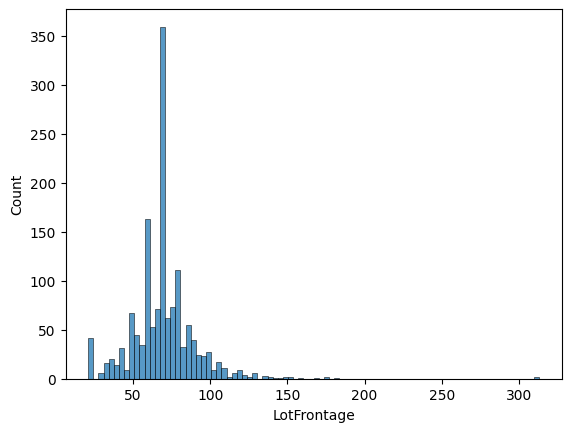

In [34]:
sns.histplot(dataframe['LotFrontage'])

# Correlacion

## Coeficiente de correlación

In [35]:
corrs = np.array([])
titles = []
for col in dataframe:
    if not (col == 'SalePrice'):
        corr = np.corrcoef(dataframe['SalePrice'], dataframe[col])
        corrs = np.append(corrs, corr[0 , 1])
        titles.append(col)
        print(f'Coeficiente de correlación entre SalePrice y {col}: \n {corr[0 , 1]} ')

coeficientes = pd.DataFrame(corrs.reshape(1,7), columns = titles)
coeficientes


Coeficiente de correlación entre SalePrice y OverallQual: 
 0.7909816005838047 
Coeficiente de correlación entre SalePrice y 1stFlrSF: 
 0.6058521846919145 
Coeficiente de correlación entre SalePrice y TotRmsAbvGrd: 
 0.5337231555820283 
Coeficiente de correlación entre SalePrice y YearBuilt: 
 0.5228973328794968 
Coeficiente de correlación entre SalePrice y LotFrontage: 
 0.3348971832698148 
Coeficiente de correlación entre SalePrice y LotFrontageMean: 
 0.3348971832698148 
Coeficiente de correlación entre SalePrice y LotFrontageMedian: 
 0.33477085313975996 


,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage,LotFrontageMean,LotFrontageMedian
0,0.790982,0.605852,0.533723,0.522897,0.334897,0.334897,0.334771


## Gráfico x vs y (scatterplot)

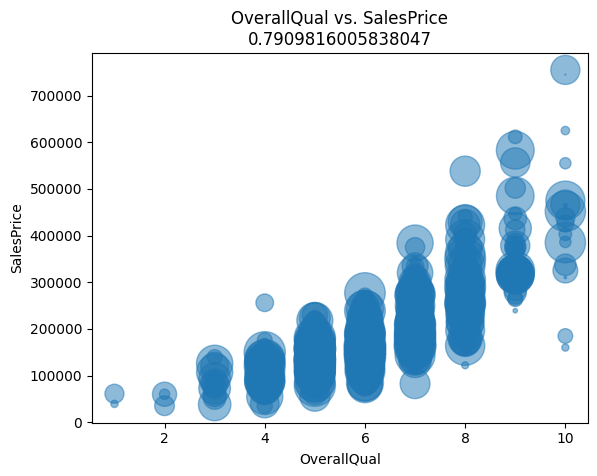

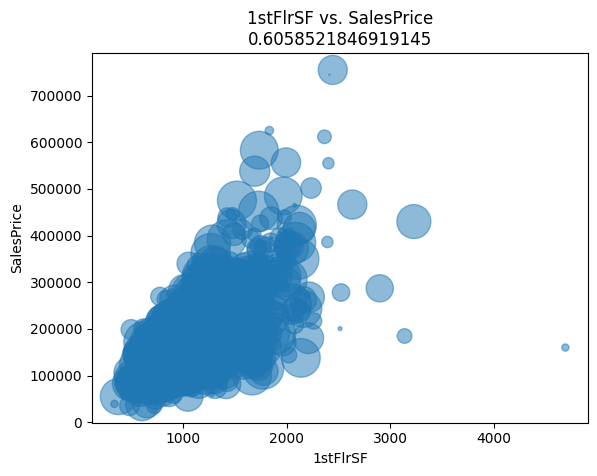

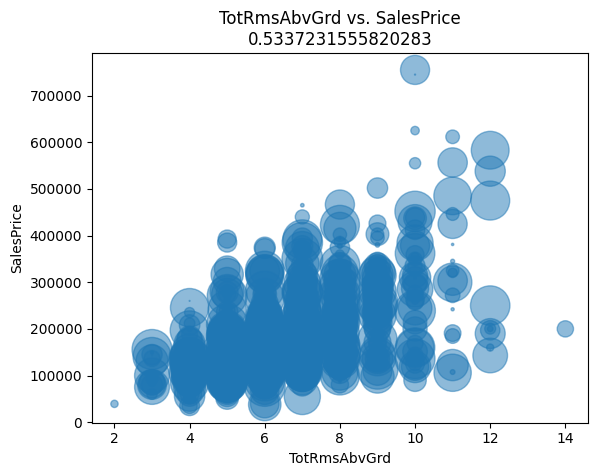

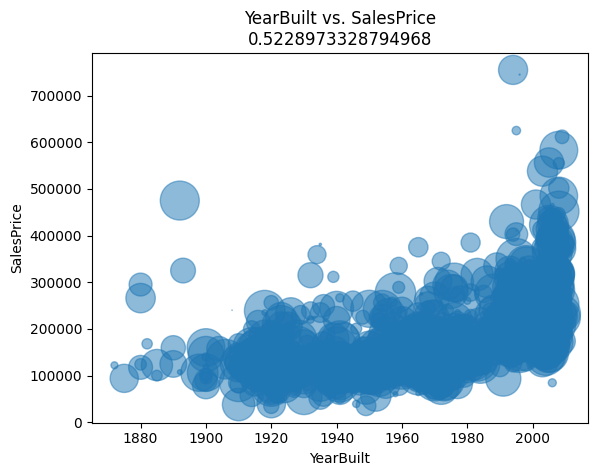

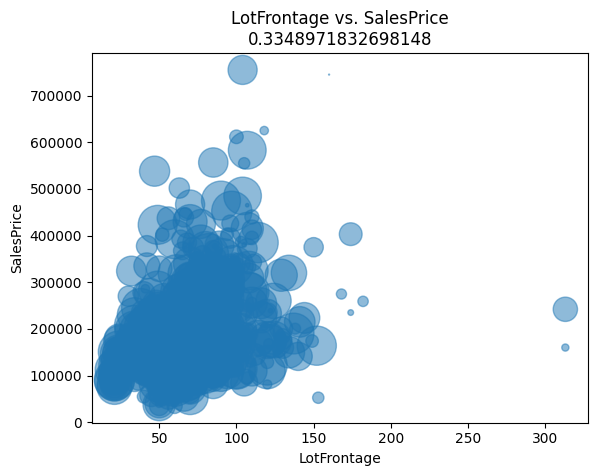

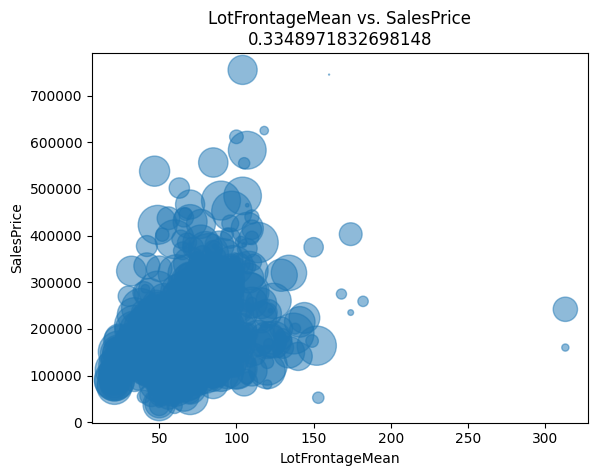

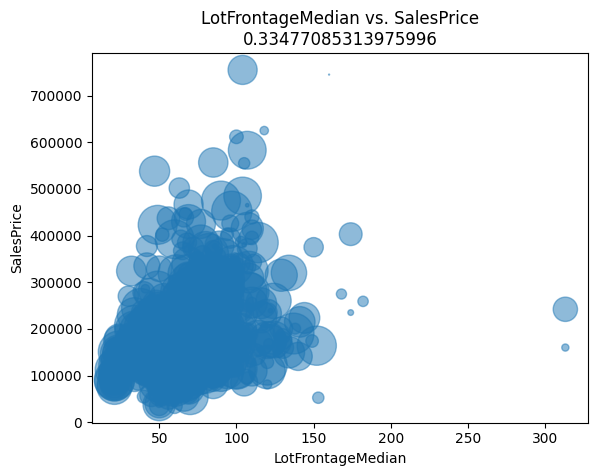

In [36]:
area = (30 * np.random.rand(1460))**2
for col in dataframe:
    if not (col == 'SalePrice'):
        plt.scatter(dataframe[col], dataframe['SalePrice'], s= area, alpha=0.5)
        plt.title(col + ' vs. SalesPrice' + '\n' + str(coeficientes[col][0]))
        plt.xlabel(col)
        plt.ylabel('SalesPrice')
        plt.show()

<Axes: >

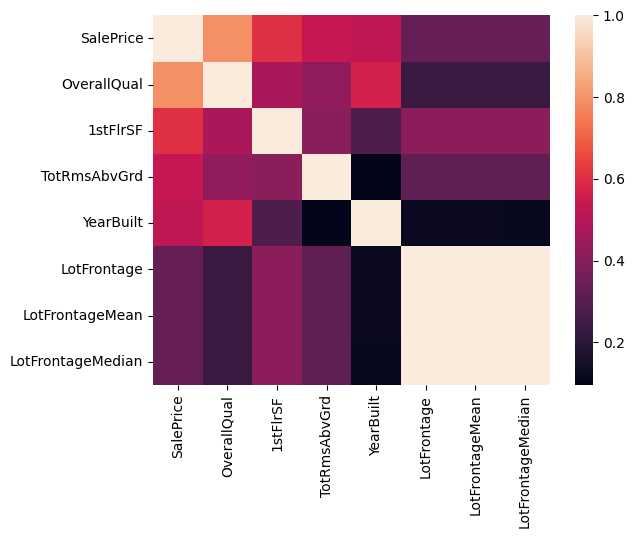

In [37]:
sns.heatmap(dataframe.corr())


## Variables que presentan mayor correlación

In [ ]:
#Segun los gráficos de correlación y el coeficiente las variables con mayor correlación con la variable SalePrice son:
# OverallQual y 1stFlrSF

# Función para entrenar un modelo de regresión lineal

In [38]:
def linear_regresion(X, Y, m, b, learning_rate):
    m_gradiente = 0
    b_gradiente = 0
    
    N = len(Y)

    for it in range (len(Y)):
        x = X[it]
        y = Y[it]

        y_hat = (m * x) + b

        m_gradiente += -(2/N) * x * (y - y_hat)
        b_gradiente += -(2/N) * (y - y_hat)

    coef = m - (m_gradiente * learning_rate)
    bias = b - (b_gradiente * learning_rate)

    return coef, bias


def train(epochs, learning_rate, X, Y):
    epochsArr = []
    #costs = []

    b0_b1 = [0,0]
     
    for i in range(epochs):
        m, b = linear_regresion(X, Y, m, b, learning_rate)
        print(m,b)

        #C = cost()

        epochsArr.append(i)

    return epochs, m, b



train(10, 0.01, [20, 30, 40, 50], [])



0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


(10, 0.0, 0.0)

In [208]:
def train(epochs, learning_rate, X, Y, imprimir_error_cada):
    dict = {}

    b1_b0 = [0, 0]
    errores = []

    for i in range(epochs):
        y_hat = np.dot(X, b1_b0)
        
        sumatoria = 0
        b0_gradiente = 0
        b1_gradiente = 0


        for j in range(len(Y)):
            #Calculo del error
            sumatoria += (Y[j] - y_hat[j])**2
            b1_gradiente += (y_hat[j] - Y[j])*X[j][0]
            b0_gradiente += (y_hat[j] - Y[j])            

            
        error = (1/(2*len(Y))) * sumatoria
        if ((i + 1) % imprimir_error_cada == 0):
            print(f'Iteración {i + 1} - Error {error}')

        errores.append(error)
        b0_gradiente = (1/len(Y)) * b0_gradiente
        b1_gradiente = (1/len(Y)) * b1_gradiente

        b1 = b1_b0[0] - (learning_rate * b1_gradiente)
        b0 = b1_b0[1] - (learning_rate * b0_gradiente)

        b1_b0 = [b1, b0] 

        dict[i] = b1_b0

    return dict, errores


In [194]:
X = np.array([trainDataFrame['OverallQual'],np.ones(shape=len(trainDataFrame['OverallQual']))])
X = np.transpose(X)
X

array([[7., 1.],
       [6., 1.],
       [7., 1.],
       ...,
       [7., 1.],
       [8., 1.],
       [6., 1.]])

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataframe['OverallQual'].values.reshape(-1,1), dataframe['SalePrice'], test_size=0.3, random_state=2023)

reg_model=LinearRegression()
reg_model.fit(X_train, y_train)
reg_model


LinearRegression()

In [206]:
print(reg_model.intercept_)
print(reg_model.coef_)

-93985.25409839742
[45035.16449243]


In [213]:
train(10000, 0.03, X, trainDataFrame['SalePrice'], 100)

Iteración 100 - Error 1333968438.7298496
Iteración 200 - Error 1287682612.7913702
Iteración 300 - Error 1252850153.678217
Iteración 400 - Error 1226636940.815123
Iteración 500 - Error 1206910153.0401351


KeyboardInterrupt: 

In [180]:
min(dataframe['SalePrice'])

34900.0